# Лабораторная №1
## Задание

Имеется выборка некоторой случайной величины ξ в виде интервального статистического ряда (табл.).

а) Построить гистограмму и график эмперической функции распределения F<sub>n</sub>(x)

б) Вычислить выборочные: среднее, дисперсию, медиану, коэффициент вариации, коэффициент асимметрии, коэффициент эксцесса

в) Добавить искусственно к данным большую флуктуацию (порядка 1000). Как изменятся вычесленные параметры? Почему?

**Вариант 17:**

| **Интервал**   | (140;145)  | (145;150)  | (150;155)  | (155;160)  | (160;165)  |
|:--------------:|:----------:|:----------:|:----------:|:----------:|:----------:|
|  **Частота**   |     45     |     105    |    100     |     40     |     10     |

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

In [22]:
amounts = [45, 105, 100, 40, 10]
intervals = [(140,145), (145,150), (150,155), (155,160), (160,165)]

### а) Построить гистограмму и график эмпирической функции распределения F<sub>n</sub>(x)

In [23]:
def intervals2str(intervals):
    return [str(interval) for interval in intervals]

$$ l_i = \frac{n_i}{n (z_k - z_{k-1})} $$

- l<sub>i</sub> - высота i-го столбика
- n<sub>i</sub> - число значений в i-ом интервале
- n общее число значений
- z<sub>i</sub> - z<sub>i-1</sub> - ширина i-го интервала

In [59]:
def plot_hist(intervals, amounts):
    total_amount = sum(amounts)
    proportion_amounts = [amount/total_amount for amount in amounts]
    step = intervals[0][1]-intervals[0][0]
    hist_amounts = [amount/step for amount in proportion_amounts]

    fig = plt.figure(figsize=(6,4))
    plt.title('Гистограмма')
    for interval, hist_value in zip(intervals, hist_amounts):
        plt.vlines(x = interval[0], ymin = 0, ymax = hist_value)
        plt.vlines(x = interval[1], ymin = 0, ymax = hist_value)
        plt.hlines(y=hist_value, xmin = interval[0], xmax= interval[1])
        
    plt.plot()

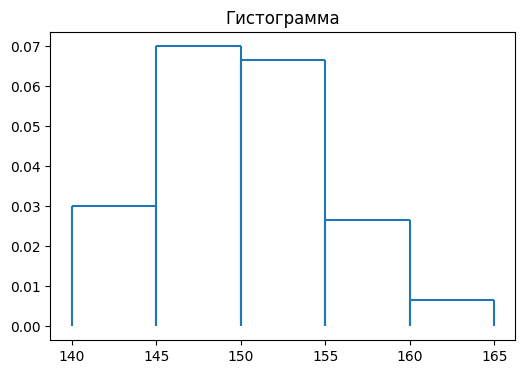

In [25]:
plot_hist(intervals, amounts)

In [26]:
from numpy import cumsum
def plot_esdf(intervals, amounts): #emperical distribution function plot
    total_amount = sum(amounts)
    proportion_amounts = [amount/total_amount for amount in amounts]
    empirical_distribution_function = list(cumsum(proportion_amounts))

    fig = plt.figure(figsize=(6,4))
    plt.title('Эмперическая функция распределения')
    step = intervals[0][1] - intervals[0][0]
    intervals_with_additions = [(intervals[0][0]-step, intervals[0][1]-step)] + intervals + [(intervals[-1][0]+step, intervals[-1][1]+step)]
    empirical_distribution_function.insert(0, 0)
    empirical_distribution_function.append(1)

    for interval, distribution_value in zip(intervals_with_additions, empirical_distribution_function):
        plt.vlines(x = interval[0], ymin = 0, ymax = distribution_value, linestyles='dotted')
        plt.vlines(x = interval[1], ymin = 0, ymax = distribution_value, linestyles='dotted')
        plt.hlines(y=distribution_value, xmin = interval[0], xmax= interval[1])

    plt.plot()

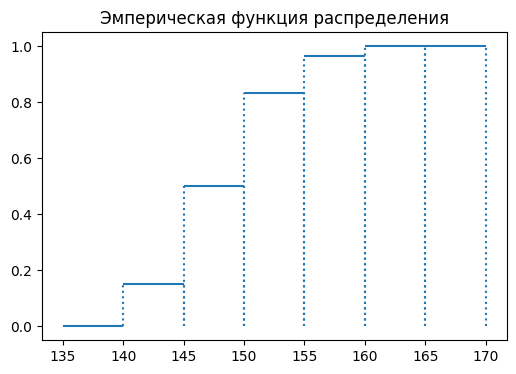

In [27]:
plot_esdf(intervals, amounts)

### б) Вычислить выборочные: среднее, дисперсию, медиану, коэффициент вариации, коэффициент асимметрии, коэффициент эксцесса

Среднее
$$ z^* = \frac{z_{i-1}+z_i}{2}$$
$$\overline{x_n} = \sum_{i=1}^{k} z^* \frac{n_i}{n}$$

In [58]:
def average(intervals, amounts):
    N = sum(amounts)
    result = 0.0
    for i in range(len(amounts)):
        dz = (intervals[i][0]+intervals[i][1])/2
        result += dz * amounts[i] / N
    return result

In [29]:
average(intervals, amounts)

150.25

Дисперсия
$$ z^* = \frac{z_{i-1}+z_i}{2}$$
$$S_n^2 = \sum_{i=1}^{k} (z^* - \overline{x_n})^2 \frac{n_i}{n}$$

In [57]:
def dispersion(intervals, amounts):
    N = sum(amounts)
    result = 0.0
    avg = average(intervals, amounts)
    for i in range(len(amounts)):
        dz = (intervals[i][0]+intervals[i][1])/2
        result += (dz-avg)*(dz-avg) * amounts[i] / N
    return result

In [31]:
dispersion(intervals, amounts)

25.354166666666664

Исправленная дисперсия
$$ z^* = \frac{z_{i-1}+z_i}{2}$$
$$S_n^2 = \frac{k}{k-1}\sum_{i=1}^{k} (z^* - \overline{x_n})^2 \frac{n_i}{n}$$

In [32]:
def dispersion_fixed(intervals, amounts):
    k = len(amounts)
    return k / (k-1) * dispersion(intervals, amounts)

In [33]:
dispersion_fixed(intervals, amounts)

31.69270833333333

[Медиана сгруппированных данных](https://www.codecamp.ru/blog/median-of-grouped-data/):

$$ L + W\frac{\frac{N}{2} – C}{F} $$

- L : Нижний предел среднего класса
- W : Ширина среднего класса
- N : Общая частота
- C : Суммарная частота до медианного класса
- F : Частота среднего класса

In [45]:
def median(intervals, amounts):
    N = sum(amounts)
    cumulative_sum = 0
    median_interval = None

    for i in range(len(amounts)):
        cumulative_sum += amounts[i]
        if cumulative_sum >= N / 2:
            median_interval = i
            break

    L = intervals[i][0]
    W = intervals[i][1]-intervals[i][0]
    C = cumulative_sum - amounts[i]
    F = amounts[i]

    return L + W * ((N/2 - C)/F)    
    

In [46]:
median(intervals, amounts)

150.0

Коэффициент вариации
$$ V = \frac{\sqrt{S_n^2}}{\overline{x_n}} $$

In [35]:
from math import sqrt
def coeff_of_variation(intervals, amounts):
    S2n = dispersion(intervals, amounts)
    avg = average(intervals, amounts)
    return sqrt(S2n)/avg

In [36]:
coeff_of_variation(intervals, amounts)

0.03351275948978545

К-тый центральный момент

$$ z^* = \frac{z_{i-1}+z_i}{2}$$
$$ \hat{M_k} = \sum_{i=1}^{k} (z^* - \overline{x_n})^k \frac{n_i}{n}$$

In [56]:
def k_moment(intervals, amounts, k = 2):
    N = sum(amounts)
    result = 0.0
    avg = average(intervals, amounts)
    for i in range(len(amounts)):
        dz = (intervals[i][0]+intervals[i][1])/2
        result += ((dz-avg)**(k)) * amounts[i] / N
    return result 

Коэффициент ассиметрии
$$ \zeta = \frac{M_3}{(S_n^2)^\frac{3}{2}} $$

In [60]:
def skewness(intervals, amounts):
    M3 = k_moment(intervals, amounts, 3)
    S2n = dispersion(intervals, amounts)
    return M3/(S2n)**(1.5)

In [42]:
skewness(intervals, amounts)

0.30377203592166263

Коэффициент эксцесса
$$ kurt = \frac{\hat{M_4}}{(S_n^2)^2} - 3$$

In [40]:
def kurt(intervals, amounts):
    M4 = k_moment(intervals, amounts, 4)
    S2n = dispersion(intervals, amounts)
    return M4/(S2n*S2n) - 3

In [41]:
kurt(intervals, amounts)

-0.37305928273047684

### в) Добавить искусственно к данным большую флуктуацию (порядка 1000). Как изменятся вычесленные параметры? Почему?

Добавим к нашим данным ещё один интервал (995, 1000), в котором будет находиться только 1 значение.

Данные примут следующий вид:

| **Интервал**   | (140;145)  | (145;150)  | (150;155)  | (155;160)  | (160;165)  | (995,1000)|
|:--------------:|:----------:|:----------:|:----------:|:----------:|:----------:|:---------:|
|  **Частота**   |     45     |     105    |    100     |     40     |     10     |     1     |

In [43]:
amounts = [45, 105, 100, 40, 10]
intervals = [(140,145), (145,150), (150,155), (155,160), (160,165)]

In [47]:
amounts_fluc = [45, 105, 100, 40, 10, 1]
intervals_fluc = [(140,145), (145,150), (150,155), (155,160), (160,165), (995, 1000)]

Среднее

In [48]:
avg = average(intervals, amounts)
avg_fluc = average(intervals_fluc, amounts_fluc)
print(avg, avg_fluc)

150.25 153.06478405315613


Дисперсия

In [50]:
S2n = dispersion(intervals, amounts)
S2n_fluc = dispersion(intervals_fluc, amounts_fluc)
print(S2n, S2n_fluc)

25.354166666666664 2402.17271332546


Медиана

In [51]:
med = median(intervals, amounts)
med_fluc = median(intervals_fluc, amounts_fluc)
print(med, med_fluc)

150.0 150.025


Коэффициент вариации

In [52]:
cofvar = coeff_of_variation(intervals, amounts)
cofvar_fluc = coeff_of_variation(intervals_fluc, amounts_fluc)
print(cofvar, cofvar_fluc)

0.03351275948978545 0.32020405807161134


Коэффициент ассиметрии

In [53]:
skwns = skewness(intervals, amounts)
skwns_fluc = skewness(intervals_fluc, amounts_fluc)
print(skwns, skwns_fluc)

0.30377203592166263 16.98960993919163


Коэффициент эксцесса

In [54]:
krt = kurt(intervals, amounts)
krt_fluc = kurt(intervals_fluc, amounts_fluc)
print(krt, krt_fluc)

-0.37305928273047684 289.7460459063314


|      **Показатель**      | **На исходных данных** | **На данных с флуктуацией** |
|:------------------------:|:----------------------:|:---------------------------:|
|         _Среднее_        |         150.25         |           153.065           |
| _Дисперсия_              |         25.354         |           2402.17           |
| _Медиана_                |         150.00         |           150.025           |
| _Коэффициент вариации_   |         0.0335         |            0.3202           |
| _Коэффициент ассиметрии_ |         0.3038         |            16.990           |
| _Коэффициент эксцесса_   |         -0.373         |            289.75           |